# Linear_Regression : Bike-Sharing-Assignment

## Problem Statement :

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

__The company wants to know__:

1. Which variables are significant in predicting the demand for shared bikes ?.
2. How well those variables describe the bike demands?.

__The Goal__:

You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 



#### Import all required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
from sklearn.metrics import r2_score
warnings.filterwarnings('ignore')

## Step-1: Reading & Understanding the Data - Routine Check

In [3]:
#importing data
bsdata = pd.read_csv('day.csv')
bsdata.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
# Checking the shape
bsdata.shape

(730, 16)

In [5]:
# Basic information about data set - non-nulls,datatpyes etc
bsdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
# Describing the dataset:
bsdata.describe(include='all')

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
unique,NaN,730,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,01-01-2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,365.500000,NaN,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,NaN,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,NaN,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000


## Step-2: Data Cleaning & EDA 

__2.1 Dropping Unessential Columns:__

1. Instant: We can drop Instant column as it does not signifys anything but row number
2. dteday: We can drop dteday column as we do not need it, the year, month and other date related details already exists.
3. casual/registered: cnt - target variable is already sum of these 2 columns thus we can drop it.

In [7]:
# Dropping Unessential Columns   
Unessential_cols = ['instant','dteday','casual','registered']
bsdata1 = bsdata.copy()
bsdata1.drop(Unessential_cols,axis=1, inplace=True)

In [8]:
bsdata1.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [9]:
bsdata1.shape

(730, 12)

__2.2 Checking missing values if any:__

In [10]:
bsdata1.isnull().sum()

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

Looks like we dont have any missing values in our data set.

__2.3 Checking Outliers if any:__

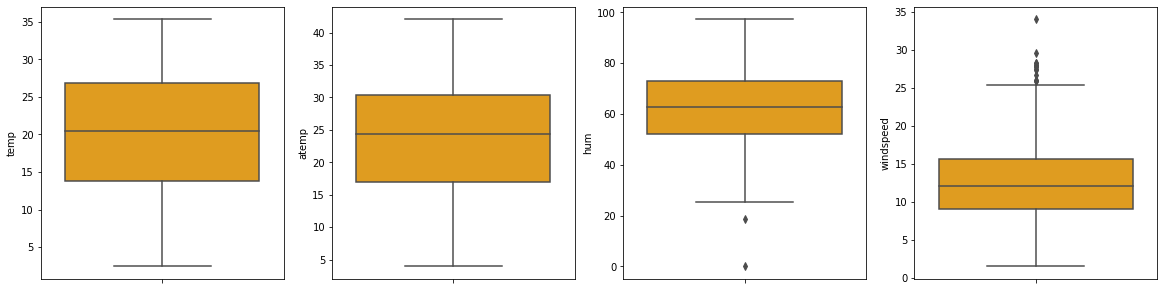

In [86]:
cols = ['temp','atemp','hum','windspeed']
plt.figure(figsize=(20,5))

i=1
for col in cols:
    plt.subplot(1,4,i)
    sns.boxplot(data=bsdata1, y=bsdata1[col],color='orange')
    i+=1

From the above we can infer that there are no outliers for the given columns.

__2.4 Visualization & EDA:__    

In [87]:
bsdata1.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


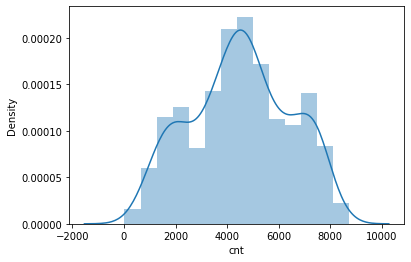

In [88]:
# Plotting Histogram for Target Variable

sns.distplot(bsdata1['cnt'])
plt.show()

From the above we can see the Target variable is normally distributed and can't find any outliers.

In [89]:
# dividing the columns into categorical and continous for further visualizations
bsdata_cat = ['season','yr','mnth','weathersit','holiday','weekday','workingday']
bsdata_cont = ['cnt','temp','atemp','hum','windspeed']

__2.4.1 Analysis on Categorical variables__

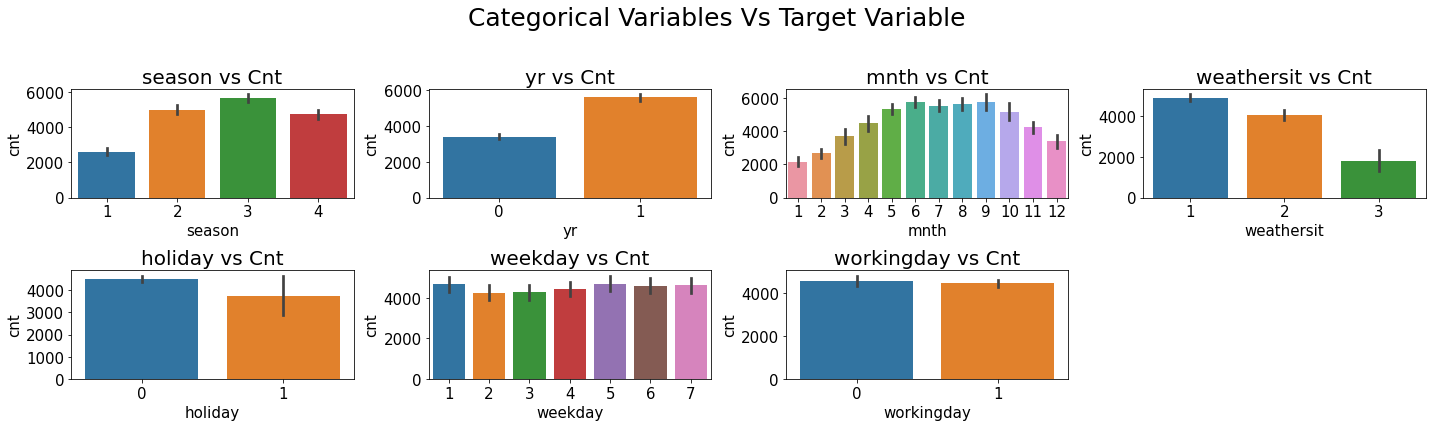

In [90]:
plt.figure(figsize=(20,8))
plt.suptitle('Categorical Variables Vs Target Variable\n', fontsize=25)

i=1
for col in bsdata_cat:
        plt.subplot(3,4,i)
        sns.barplot(x=bsdata1[col],y=bsdata1['cnt'])
        title = f'{col} vs Cnt'
        plt.xlabel(col,size=15)
        plt.ylabel('cnt', size=15)
        plt.title(title, size=20)
        if col == 'weekday':
            plt.xticks(ticks=(0,1,2,3,4,5,6),labels=[1,2,3,4,5,6,7],size=15)
        else:
            plt.xticks(size=15)

        plt.yticks(size=15)    
    
        i+=1    
    

plt.tight_layout()

__Inferences from the above:__
1. Working day and weekday variables doesn't seem to be of effective use.
2. When we see month vs cnt, we can depict that June through September is the peak season or time of the year where the demand is consistently or increasing compared to other months. Considering the weather situations are good compared to December when its high snowfall.
3. Summer & Fall seasons of the year have comparatively higher demand.
4. A good weather situation i.e. "1"(Clear and partly cloudy weather) has slightly good demand. Where in the weather situation of thunderstorm or rainy there are least users for the bike sharing.
5. The year 2019 was better than the year 2018.


__2.4.2 Analysis on Continous variables__

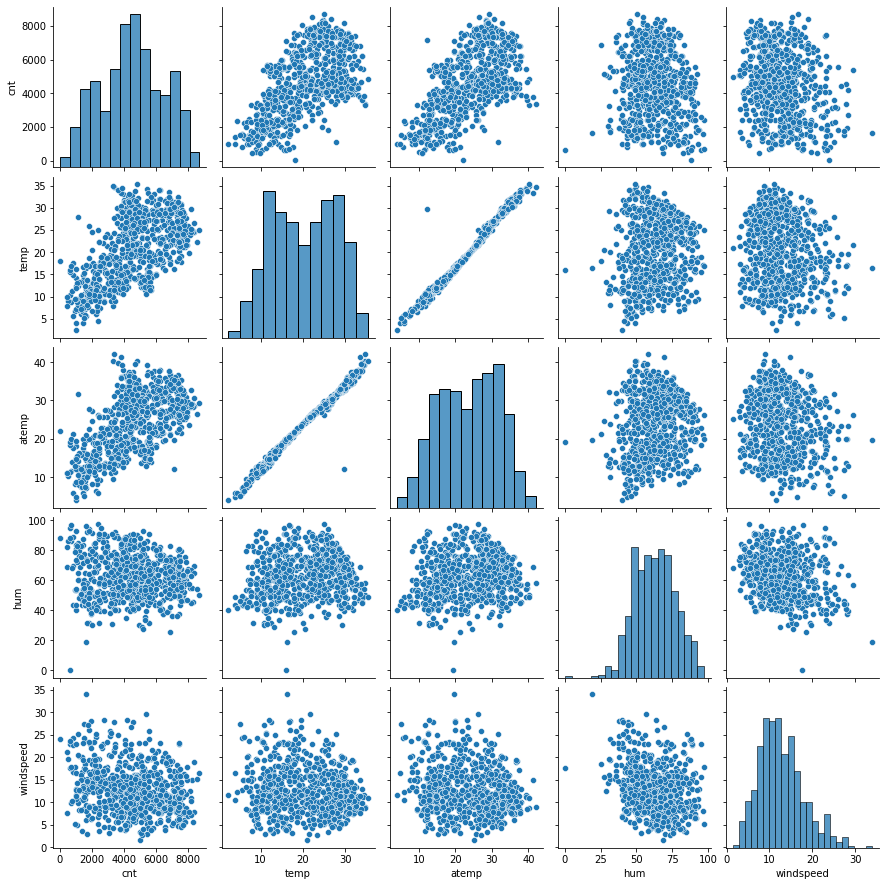

In [91]:
sns.pairplot(bsdata1[bsdata_cont])
plt.show()

__Inferences from the above:__
1. From the above we can see that windspeed and humidity doesn't seem to have any strong relationship with the target variable.
2. 'temp/atemp' variables seems to have kind of stronger linear relationship comparatively.

__2.4.3 Correlation Analysis__

To back our inferences and assumptions based on above analysis and visualizations we can try and draw a heatmap

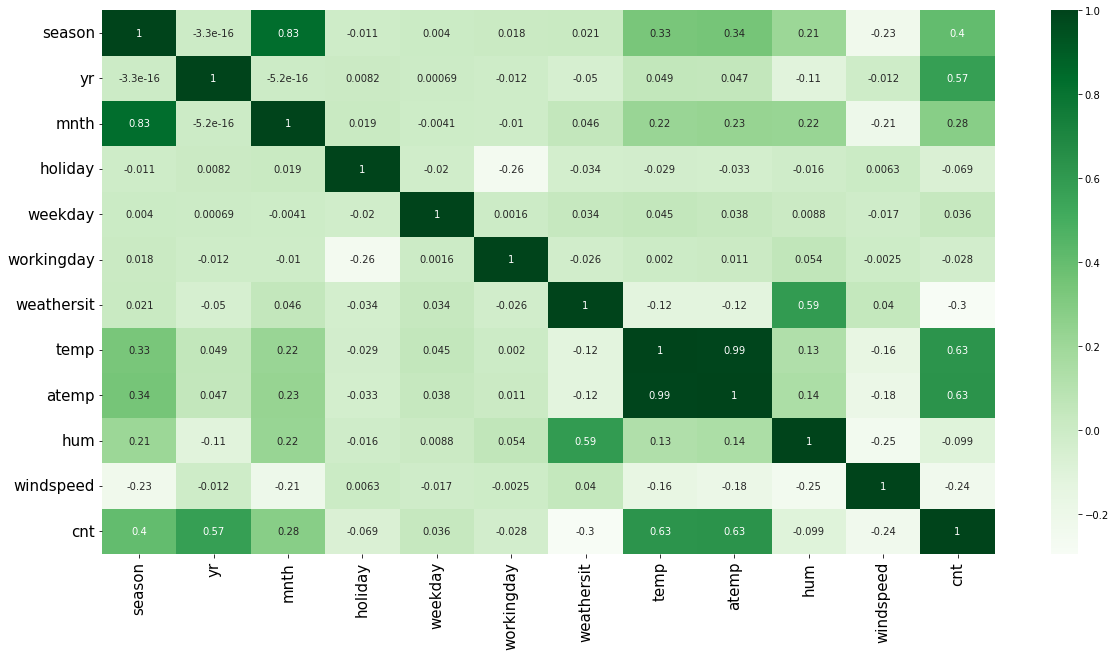

In [92]:
plt.figure(figsize=(20,10))
bsdata1_correlation = bsdata1.corr()
sns.heatmap(bsdata1_correlation, cmap='Greens', annot=True)
plt.xticks(size=15, rotation=90)
plt.yticks(size=15)
plt.show()

__Inferences from the above:__
1. As we inferred from the above pairplot that there is certain kind of strong relationship between target variable 'cnt' and 'temp/atemp', we can see the same in heatmap that there is a considerably good correlation between 'cnt' and 'temp/atemp'.
2. We can drop unessential variables like 'Weekday', 'humidity' & 'Workingday' as there is very less or poor correlation.

In [93]:
# Let's drop all the unessential variables based on above findings
bsdata2 = bsdata1.drop(['weekday','workingday','hum','atemp'], axis=1)
bsdata2.head()

,season,yr,mnth,holiday,weathersit,temp,windspeed,cnt
0,1,0,1,0,2,14.110847,10.749882,985
1,1,0,1,0,2,14.902598,16.652113,801
2,1,0,1,0,1,8.050924,16.636703,1349
3,1,0,1,0,1,8.200000,10.739832,1562
4,1,0,1,0,1,9.305237,12.522300,1600


In [94]:
bsdata2.shape

(730, 8)

## Step-3: Data Preparation for Model Building 

__3.1 Creating Dummy Variables__

In [95]:
# Checking datatypes of columns before creating dummies,as we need to create dummy variables for categorical columns
bsdata2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weathersit  730 non-null    int64  
 5   temp        730 non-null    float64
 6   windspeed   730 non-null    float64
 7   cnt         730 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 45.8 KB


In [96]:
# converting certain columns to object/categorical
cat_conv_cols = ['season','weathersit','holiday','yr','mnth']

bsdata2[cat_conv_cols] = bsdata2[cat_conv_cols].apply(lambda x: x.astype('category')) 
bsdata2.info()
    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    category
 2   mnth        730 non-null    category
 3   holiday     730 non-null    category
 4   weathersit  730 non-null    category
 5   temp        730 non-null    float64 
 6   windspeed   730 non-null    float64 
 7   cnt         730 non-null    int64   
dtypes: category(5), float64(2), int64(1)
memory usage: 21.8 KB


__Dummy Variables__

In [97]:
bsdata2 = pd.get_dummies(bsdata2, drop_first=True)

In [98]:
bsdata2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   temp          730 non-null    float64
 1   windspeed     730 non-null    float64
 2   cnt           730 non-null    int64  
 3   season_2      730 non-null    uint8  
 4   season_3      730 non-null    uint8  
 5   season_4      730 non-null    uint8  
 6   yr_1          730 non-null    uint8  
 7   mnth_2        730 non-null    uint8  
 8   mnth_3        730 non-null    uint8  
 9   mnth_4        730 non-null    uint8  
 10  mnth_5        730 non-null    uint8  
 11  mnth_6        730 non-null    uint8  
 12  mnth_7        730 non-null    uint8  
 13  mnth_8        730 non-null    uint8  
 14  mnth_9        730 non-null    uint8  
 15  mnth_10       730 non-null    uint8  
 16  mnth_11       730 non-null    uint8  
 17  mnth_12       730 non-null    uint8  
 18  holiday_1     730 non-null    

In [99]:
bsdata2.shape

(730, 21)

In [100]:
bsdata2

,temp,windspeed,cnt,season_2,season_3,season_4,yr_1,mnth_2,mnth_3,mnth_4,...,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,holiday_1,weathersit_2,weathersit_3
0,14.110847,10.749882,985,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,14.902598,16.652113,801,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,8.050924,16.636703,1349,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,8.200000,10.739832,1562,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9.305237,12.522300,1600,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,10.420847,23.458911,2114,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
726,10.386653,10.416557,3095,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
727,10.386653,8.333661,1341,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
728,10.489153,23.500518,1796,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0


__3.2 Partitioning Data into Train-Test Data__

In [101]:
bsdata_train,bsdata_test = train_test_split(bsdata2,train_size=0.7, test_size=0.3, random_state=100)

In [102]:
bsdata_train.head()

,temp,windspeed,cnt,season_2,season_3,season_4,yr_1,mnth_2,mnth_3,mnth_4,...,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,holiday_1,weathersit_2,weathersit_3
653,19.201653,12.208807,7534,0,0,1,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
576,29.246653,11.083475,7216,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
426,16.980847,10.792293,4066,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
728,10.489153,23.500518,1796,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
482,15.443347,8.708325,4220,1,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0


In [103]:
bsdata_test.head()

,temp,windspeed,cnt,season_2,season_3,season_4,yr_1,mnth_2,mnth_3,mnth_4,...,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,holiday_1,weathersit_2,weathersit_3
184,29.793347,5.459106,6043,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,1,0
535,32.082500,7.625404,6211,1,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
299,19.270000,13.250121,2659,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
221,31.433347,13.417286,4780,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
152,29.315000,19.583229,4968,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


__3.3 Rescaling The Variables/Features__

In [104]:
# Using MinMaxScaler() from preprocessing module of ScikitLearn
mmscaler=MinMaxScaler()

In [105]:
# Identifying columns that needs rescaling, performing rescaling
bsdata_numcols = ['temp','cnt','windspeed']

bsdata_train[bsdata_numcols] = mmscaler.fit_transform(bsdata_train[bsdata_numcols])

In [106]:
bsdata_train.head()

,temp,windspeed,cnt,season_2,season_3,season_4,yr_1,mnth_2,mnth_3,mnth_4,...,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,holiday_1,weathersit_2,weathersit_3
653,0.509887,0.300794,0.864243,0,0,1,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
576,0.815169,0.264686,0.827658,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
426,0.442393,0.255342,0.465255,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
728,0.245101,0.663106,0.204096,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
482,0.395666,0.188475,0.482973,1,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0


__3.4 Creating X & y Variables__

In [107]:
y_train = bsdata_train.pop('cnt')
X_train = bsdata_train

## Step-4: Model Building 

__4.1 Feature selection using RFE(Recursive Feature Elimination) method__

In [108]:
# Creating linear model and using RFE to select top 'n' features.
lm = LinearRegression()
lm.fit(X_train,y_train)

rfe = RFE(estimator=lm, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)


In [109]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('temp', True, 1),
 ('windspeed', True, 1),
 ('season_2', True, 1),
 ('season_3', True, 1),
 ('season_4', True, 1),
 ('yr_1', True, 1),
 ('mnth_2', False, 3),
 ('mnth_3', True, 1),
 ('mnth_4', True, 1),
 ('mnth_5', True, 1),
 ('mnth_6', True, 1),
 ('mnth_7', False, 4),
 ('mnth_8', True, 1),
 ('mnth_9', True, 1),
 ('mnth_10', False, 2),
 ('mnth_11', False, 5),
 ('mnth_12', False, 6),
 ('holiday_1', True, 1),
 ('weathersit_2', True, 1),
 ('weathersit_3', True, 1)]

In [110]:
final_columns = X_train.columns[rfe.support_]
final_columns

Index(['temp', 'windspeed', 'season_2', 'season_3', 'season_4', 'yr_1',
       'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_8', 'mnth_9', 'holiday_1',
       'weathersit_2', 'weathersit_3'],
      dtype='object')

In [111]:
X_train = X_train[final_columns]
X_train

,temp,windspeed,season_2,season_3,season_4,yr_1,mnth_3,mnth_4,mnth_5,mnth_6,mnth_8,mnth_9,holiday_1,weathersit_2,weathersit_3
653,0.509887,0.300794,0,0,1,1,0,0,0,0,0,0,0,0,0
576,0.815169,0.264686,0,1,0,1,0,0,0,0,0,0,0,0,0
426,0.442393,0.255342,0,0,0,1,1,0,0,0,0,0,0,1,0
728,0.245101,0.663106,0,0,0,1,0,0,0,0,0,0,0,0,0
482,0.395666,0.188475,1,0,0,1,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,0.824514,0.355596,1,0,0,1,0,0,0,1,0,0,0,1,0
578,0.863973,0.187140,0,1,0,1,0,0,0,0,1,0,0,0,0
53,0.202618,0.111379,0,0,0,0,0,0,0,0,0,0,0,0,0
350,0.248216,0.431816,0,0,1,0,0,0,0,0,0,0,0,1,0


__4.2 Building Models__

In [112]:
# Model Number - 1
X_train_lm = sm.add_constant(X_train)
lr_1 = sm.OLS(y_train,X_train_lm)
lr_model1 = lr_1.fit()

In [113]:
lr_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     170.9
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          1.88e-184
Time:                        12:11:29   Log-Likelihood:                 503.37
No. Observations:                 510   AIC:                            -974.7
Df Residuals:                     494   BIC:                            -907.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1315      0.017      7.628      0.000       0.098       0.165
temp             0.4529      0.036     12.633      0.000       0.382       0.523
windspeed       -0.1514      0.025     -5.973      0.000      -0.201      -0.102
season_2         0.0842      0.022      3.770      0.000       0.040       0.128
season_3         0.0516      0.023      2.216      0.027       0.006       0.097
season_4         0.1665      0.014     11.929      0.000       0.139       0.194
yr_1             0.2337      0.008     28.382      0.000       0.218       0.250
mnth_3           0.0525      0.017      3.033      0.003       0.019       0.087
mnth_4           0.0504      0.026      1.907      0.057      -0.002       0.102
mnth_5           0.0608      0.027      2.259      0.024       0.008       0.114
mnth_6           0.0435      0.023      1.890      0.059      -0.002       0.089
mnth_8           0.0537      0.019      2.898      0.004       0.017       0.090
mnth_9           0.1136      0.018      6.382      0.000       0.079       0.149
holiday_1       -0.0899      0.026     -3.450      0.001      -0.141      -0.039
weathersit_2    -0.0818      0.009     -9.292      0.000      -0.099      -0.064
weathersit_3    -0.2844      0.025    -11.529      0.000      -0.333      -0.236
==============================================================================
Omnibus:                       60.900   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              140.192
Skew:                          -0.641   Prob(JB):                     3.61e-31
Kurtosis:                       5.226   Cond. No.                         16.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

__Checking VIF : Model Number - 1__

In [114]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif



,Features,VIF
0,temp,17.84
3,season_3,8.40
2,season_2,7.41
8,mnth_5,3.71
1,windspeed,3.60
7,mnth_4,3.33
4,season_4,2.85
9,mnth_6,2.38
5,yr_1,2.05
10,mnth_8,2.01


__Dropping 'mnth_6' due to low significance_level & high p-value and re-building model__

In [115]:
X_train_1 = X_train.drop('mnth_6', axis=1)
X_train_1.head()

,temp,windspeed,season_2,season_3,season_4,yr_1,mnth_3,mnth_4,mnth_5,mnth_8,mnth_9,holiday_1,weathersit_2,weathersit_3
653,0.509887,0.300794,0,0,1,1,0,0,0,0,0,0,0,0
576,0.815169,0.264686,0,1,0,1,0,0,0,0,0,0,0,0
426,0.442393,0.255342,0,0,0,1,1,0,0,0,0,0,1,0
728,0.245101,0.663106,0,0,0,1,0,0,0,0,0,0,0,0
482,0.395666,0.188475,1,0,0,1,0,1,0,0,0,0,1,0


In [116]:
# Model Number - 2
X_train_lm = sm.add_constant(X_train_1)
lr_2 = sm.OLS(y_train,X_train_lm)
lr_model2 = lr_2.fit()

In [117]:
lr_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     181.9
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          8.03e-185
Time:                        12:11:30   Log-Likelihood:                 501.54
No. Observations:                 510   AIC:                            -973.1
Df Residuals:                     495   BIC:                            -909.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1290      0.017      7.485      0.000       0.095       0.163
temp             0.4748      0.034     13.964      0.000       0.408       0.542
windspeed       -0.1511      0.025     -5.947      0.000      -0.201      -0.101
season_2         0.1045      0.020      5.324      0.000       0.066       0.143
season_3         0.0468      0.023      2.018      0.044       0.001       0.092
season_4         0.1603      0.014     11.783      0.000       0.134       0.187
yr_1             0.2333      0.008     28.268      0.000       0.217       0.250
mnth_3           0.0391      0.016      2.470      0.014       0.008       0.070
mnth_4           0.0222      0.022      1.015      0.310      -0.021       0.065
mnth_5           0.0292      0.021      1.381      0.168      -0.012       0.071
mnth_8           0.0438      0.018      2.457      0.014       0.009       0.079
mnth_9           0.1066      0.017      6.107      0.000       0.072       0.141
holiday_1       -0.0920      0.026     -3.529      0.000      -0.143      -0.041
weathersit_2    -0.0826      0.009     -9.379      0.000      -0.100      -0.065
weathersit_3    -0.2865      0.025    -11.597      0.000      -0.335      -0.238
==============================================================================
Omnibus:                       61.542   Durbin-Watson:                   2.035
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              137.403
Skew:                          -0.658   Prob(JB):                     1.46e-30
Kurtosis:                       5.176   Cond. No.                         15.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

__Checking VIF : Model Number - 2__

In [118]:
vif  = pd.DataFrame()
vif['Features'] = X_train_1.columns
vif['VIF'] =  [variance_inflation_factor(X_train_1.values,i) for i in range(X_train_1.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif  = vif.sort_values(by='VIF', ascending = False)
vif

,Features,VIF
0,temp,15.75
3,season_3,8.32
2,season_2,5.65
1,windspeed,3.60
4,season_4,2.67
8,mnth_5,2.28
7,mnth_4,2.25
5,yr_1,2.04
9,mnth_8,1.85
12,weathersit_2,1.50


__Dropping 'mnth_4' due to low significance_level & high p-value and re-building model__

In [119]:
X_train_1 = X_train_1.drop('mnth_4', axis=1)
X_train_1.head()

,temp,windspeed,season_2,season_3,season_4,yr_1,mnth_3,mnth_5,mnth_8,mnth_9,holiday_1,weathersit_2,weathersit_3
653,0.509887,0.300794,0,0,1,1,0,0,0,0,0,0,0
576,0.815169,0.264686,0,1,0,1,0,0,0,0,0,0,0
426,0.442393,0.255342,0,0,0,1,1,0,0,0,0,1,0
728,0.245101,0.663106,0,0,0,1,0,0,0,0,0,0,0
482,0.395666,0.188475,1,0,0,1,0,0,0,0,0,1,0


In [120]:
# Model Number - 3
X_train_lm = sm.add_constant(X_train_1)
lr_3 = sm.OLS(y_train,X_train_lm)
lr_model3 = lr_3.fit()

In [121]:
lr_model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     195.8
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          9.38e-186
Time:                        12:11:30   Log-Likelihood:                 501.01
No. Observations:                 510   AIC:                            -974.0
Df Residuals:                     496   BIC:                            -914.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1305      0.017      7.602      0.000       0.097       0.164
temp             0.4693      0.034     13.982      0.000       0.403       0.535
windspeed       -0.1479      0.025     -5.866      0.000      -0.197      -0.098
season_2         0.1165      0.016      7.433      0.000       0.086       0.147
season_3         0.0486      0.023      2.103      0.036       0.003       0.094
season_4         0.1601      0.014     11.768      0.000       0.133       0.187
yr_1             0.2338      0.008     28.384      0.000       0.218       0.250
mnth_3           0.0341      0.015      2.266      0.024       0.005       0.064
mnth_5           0.0182      0.018      1.001      0.317      -0.017       0.054
mnth_8           0.0438      0.018      2.457      0.014       0.009       0.079
mnth_9           0.1065      0.017      6.102      0.000       0.072       0.141
holiday_1       -0.0918      0.026     -3.519      0.000      -0.143      -0.041
weathersit_2    -0.0828      0.009     -9.394      0.000      -0.100      -0.065
weathersit_3    -0.2865      0.025    -11.595      0.000      -0.335      -0.238
==============================================================================
Omnibus:                       62.807   Durbin-Watson:                   2.046
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              141.621
Skew:                          -0.667   Prob(JB):                     1.77e-31
Kurtosis:                       5.210   Cond. No.                         14.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

__Checking VIF : Model Number - 3__

In [122]:
vif  = pd.DataFrame()
vif['Features'] = X_train_1.columns
vif['VIF'] =  [variance_inflation_factor(X_train_1.values,i) for i in range(X_train_1.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif  = vif.sort_values(by='VIF', ascending = False)
vif

,Features,VIF
0,temp,15.46
3,season_3,8.29
2,season_2,3.63
1,windspeed,3.44
4,season_4,2.67
5,yr_1,2.03
8,mnth_8,1.85
7,mnth_5,1.68
11,weathersit_2,1.50
9,mnth_9,1.48


__Dropping 'mnth_5' due to low significance_level & high p-value and re-building model__

In [123]:
X_train_1 = X_train_1.drop('mnth_5', axis=1)
X_train_1.head()

,temp,windspeed,season_2,season_3,season_4,yr_1,mnth_3,mnth_8,mnth_9,holiday_1,weathersit_2,weathersit_3
653,0.509887,0.300794,0,0,1,1,0,0,0,0,0,0
576,0.815169,0.264686,0,1,0,1,0,0,0,0,0,0
426,0.442393,0.255342,0,0,0,1,1,0,0,0,1,0
728,0.245101,0.663106,0,0,0,1,0,0,0,0,0,0
482,0.395666,0.188475,1,0,0,1,0,0,0,0,1,0


In [124]:
# Model Number - 4
X_train_lm = sm.add_constant(X_train_1)
lr_4 = sm.OLS(y_train,X_train_lm)
lr_model4 = lr_4.fit()

In [125]:
lr_model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     212.1
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          1.04e-186
Time:                        12:11:30   Log-Likelihood:                 500.49
No. Observations:                 510   AIC:                            -975.0
Df Residuals:                     497   BIC:                            -919.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1301      0.017      7.580      0.000       0.096       0.164
temp             0.4762      0.033     14.494      0.000       0.412       0.541
windspeed       -0.1502      0.025     -5.979      0.000      -0.199      -0.101
season_2         0.1204      0.015      7.920      0.000       0.091       0.150
season_3         0.0442      0.023      1.949      0.052      -0.000       0.089
season_4         0.1582      0.013     11.746      0.000       0.132       0.185
yr_1             0.2333      0.008     28.376      0.000       0.217       0.249
mnth_3           0.0312      0.015      2.112      0.035       0.002       0.060
mnth_8           0.0437      0.018      2.451      0.015       0.009       0.079
mnth_9           0.1066      0.017      6.105      0.000       0.072       0.141
holiday_1       -0.0925      0.026     -3.547      0.000      -0.144      -0.041
weathersit_2    -0.0821      0.009     -9.345      0.000      -0.099      -0.065
weathersit_3    -0.2866      0.025    -11.599      0.000      -0.335      -0.238
==============================================================================
Omnibus:                       61.437   Durbin-Watson:                   2.048
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              134.121
Skew:                          -0.664   Prob(JB):                     7.51e-30
Kurtosis:                       5.132   Cond. No.                         14.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

__Checking VIF : Model Number - 4__

In [126]:
vif  = pd.DataFrame()
vif['Features'] = X_train_1.columns
vif['VIF'] =  [variance_inflation_factor(X_train_1.values,i) for i in range(X_train_1.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif  = vif.sort_values(by='VIF', ascending = False)
vif

,Features,VIF
0,temp,14.62
3,season_3,8.00
2,season_2,3.41
1,windspeed,3.39
4,season_4,2.61
5,yr_1,2.02
7,mnth_8,1.85
10,weathersit_2,1.50
8,mnth_9,1.48
6,mnth_3,1.25


__Dropping 'season_3' due to low significance_level & high p-value and re-building model__

In [127]:
X_train_1 = X_train_1.drop('season_3', axis=1)
X_train_1.head()

,temp,windspeed,season_2,season_4,yr_1,mnth_3,mnth_8,mnth_9,holiday_1,weathersit_2,weathersit_3
653,0.509887,0.300794,0,1,1,0,0,0,0,0,0
576,0.815169,0.264686,0,0,1,0,0,0,0,0,0
426,0.442393,0.255342,0,0,1,1,0,0,0,1,0
728,0.245101,0.663106,0,0,1,0,0,0,0,0,0
482,0.395666,0.188475,1,0,1,0,0,0,0,1,0


In [128]:
# Model Number - 5
X_train_lm = sm.add_constant(X_train_1)
lr_5 = sm.OLS(y_train,X_train_lm)
lr_model5 = lr_5.fit()

In [129]:
lr_model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     229.7
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          4.40e-187
Time:                        12:11:30   Log-Likelihood:                 498.55
No. Observations:                 510   AIC:                            -973.1
Df Residuals:                     498   BIC:                            -922.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1250      0.017      7.350      0.000       0.092       0.158
temp             0.5235      0.022     23.597      0.000       0.480       0.567
windspeed       -0.1527      0.025     -6.074      0.000      -0.202      -0.103
season_2         0.1001      0.011      9.023      0.000       0.078       0.122
season_4         0.1427      0.011     13.092      0.000       0.121       0.164
yr_1             0.2323      0.008     28.230      0.000       0.216       0.248
mnth_3           0.0255      0.015      1.759      0.079      -0.003       0.054
mnth_8           0.0563      0.017      3.382      0.001       0.024       0.089
mnth_9           0.1180      0.016      7.155      0.000       0.086       0.150
holiday_1       -0.0945      0.026     -3.615      0.000      -0.146      -0.043
weathersit_2    -0.0825      0.009     -9.366      0.000      -0.100      -0.065
weathersit_3    -0.2843      0.025    -11.487      0.000      -0.333      -0.236
==============================================================================
Omnibus:                       55.139   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              113.850
Skew:                          -0.619   Prob(JB):                     1.90e-25
Kurtosis:                       4.955   Cond. No.                         10.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

__Checking VIF : Model Number - 5__

In [130]:
vif  = pd.DataFrame()
vif['Features'] = X_train_1.columns
vif['VIF'] =  [variance_inflation_factor(X_train_1.values,i) for i in range(X_train_1.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif  = vif.sort_values(by='VIF', ascending = False)
vif

,Features,VIF
0,temp,5.01
1,windspeed,3.29
4,yr_1,2.01
2,season_2,1.81
6,mnth_8,1.59
3,season_4,1.53
9,weathersit_2,1.49
7,mnth_9,1.31
5,mnth_3,1.19
10,weathersit_3,1.08


__Dropping 'mnth_3' due to low significance_level & high p-value and re-building model__

In [131]:
X_train_1 = X_train_1.drop('mnth_3', axis=1)
X_train_1.head()

,temp,windspeed,season_2,season_4,yr_1,mnth_8,mnth_9,holiday_1,weathersit_2,weathersit_3
653,0.509887,0.300794,0,1,1,0,0,0,0,0
576,0.815169,0.264686,0,0,1,0,0,0,0,0
426,0.442393,0.255342,0,0,1,0,0,0,1,0
728,0.245101,0.663106,0,0,1,0,0,0,0,0
482,0.395666,0.188475,1,0,1,0,0,0,1,0


In [132]:
# Model Number - 6
X_train_lm = sm.add_constant(X_train_1)
lr_6 = sm.OLS(y_train,X_train_lm)
lr_model6 = lr_6.fit()

In [133]:
lr_model6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     251.3
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          1.26e-187
Time:                        12:11:30   Log-Likelihood:                 496.97
No. Observations:                 510   AIC:                            -971.9
Df Residuals:                     499   BIC:                            -925.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1312      0.017      7.871      0.000       0.098       0.164
temp             0.5174      0.022     23.564      0.000       0.474       0.560
windspeed       -0.1497      0.025     -5.956      0.000      -0.199      -0.100
season_2         0.1000      0.011      8.995      0.000       0.078       0.122
season_4         0.1383      0.011     13.003      0.000       0.117       0.159
yr_1             0.2325      0.008     28.202      0.000       0.216       0.249
mnth_8           0.0542      0.017      3.253      0.001       0.021       0.087
mnth_9           0.1162      0.016      7.045      0.000       0.084       0.149
holiday_1       -0.0971      0.026     -3.715      0.000      -0.148      -0.046
weathersit_2    -0.0825      0.009     -9.354      0.000      -0.100      -0.065
weathersit_3    -0.2828      0.025    -11.411      0.000      -0.332      -0.234
==============================================================================
Omnibus:                       55.419   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              120.468
Skew:                          -0.605   Prob(JB):                     6.93e-27
Kurtosis:                       5.050   Cond. No.                         10.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

__Checking VIF : Model Number - 6__

In [134]:
vif  = pd.DataFrame()
vif['Features'] = X_train_1.columns
vif['VIF'] =  [variance_inflation_factor(X_train_1.values,i) for i in range(X_train_1.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif  = vif.sort_values(by='VIF', ascending = False)
vif

,Features,VIF
0,temp,5.01
1,windspeed,3.10
4,yr_1,2.00
2,season_2,1.81
5,mnth_8,1.58
3,season_4,1.49
8,weathersit_2,1.48
6,mnth_9,1.31
9,weathersit_3,1.08
7,holiday_1,1.04


__Dropping 'windspeed' as it is insignificant and re-building model__

In [135]:
X_train_1 = X_train_1.drop('windspeed', axis=1)
X_train_1.head()

,temp,season_2,season_4,yr_1,mnth_8,mnth_9,holiday_1,weathersit_2,weathersit_3
653,0.509887,0,1,1,0,0,0,0,0
576,0.815169,0,0,1,0,0,0,0,0
426,0.442393,0,0,1,0,0,0,1,0
728,0.245101,0,0,1,0,0,0,0,0
482,0.395666,1,0,1,0,0,0,1,0


In [136]:
# Model Number - 7
X_train_lm = sm.add_constant(X_train_1)
lr_7 = sm.OLS(y_train,X_train_lm)
lr_model7 = lr_7.fit()

In [137]:
lr_model7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     257.6
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          1.99e-181
Time:                        12:11:30   Log-Likelihood:                 479.46
No. Observations:                 510   AIC:                            -938.9
Df Residuals:                     500   BIC:                            -896.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0703      0.014      5.164      0.000       0.044       0.097
temp             0.5390      0.022     24.080      0.000       0.495       0.583
season_2         0.0956      0.011      8.336      0.000       0.073       0.118
season_4         0.1462      0.011     13.389      0.000       0.125       0.168
yr_1             0.2313      0.009     27.142      0.000       0.215       0.248
mnth_8           0.0585      0.017      3.399      0.001       0.025       0.092
mnth_9           0.1236      0.017      7.270      0.000       0.090       0.157
holiday_1       -0.1002      0.027     -3.707      0.000      -0.153      -0.047
weathersit_2    -0.0809      0.009     -8.875      0.000      -0.099      -0.063
weathersit_3    -0.2974      0.026    -11.660      0.000      -0.347      -0.247
==============================================================================
Omnibus:                       62.948   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              146.343
Skew:                          -0.658   Prob(JB):                     1.67e-32
Kurtosis:                       5.270   Cond. No.                         9.16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

__Checking VIF : Model Number - 7__

In [138]:
vif  = pd.DataFrame()
vif['Features'] = X_train_1.columns
vif['VIF'] =  [variance_inflation_factor(X_train_1.values,i) for i in range(X_train_1.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif  = vif.sort_values(by='VIF', ascending = False)
vif

,Features,VIF
0,temp,3.92
3,yr_1,1.94
1,season_2,1.78
4,mnth_8,1.56
2,season_4,1.47
7,weathersit_2,1.44
5,mnth_9,1.29
8,weathersit_3,1.06
6,holiday_1,1.03


__Now, After continous iterative process of feature-elimination and model re-building , The Model Number - 7 looks to be a balanced significant model with a decent VIF & p-values of the coefficients__

__4.3 Residual Analysis On Error Terms__

In [139]:
# Predicting the y_pred on train_Data
y_train_pred = lr_model7.predict(X_train_lm)
y_train_pred

653    0.722529
576    0.740935
426    0.459064
728    0.433646
482    0.529455
         ...   
526    0.760621
578    0.825697
53     0.179483
350    0.269285
79     0.334306
Length: 510, dtype: float64

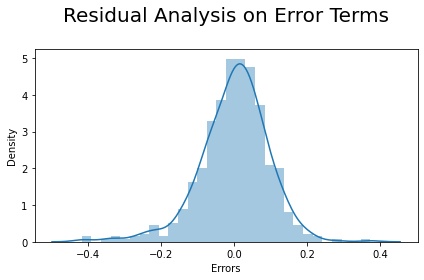

In [140]:
# Plotting Error terms
error = y_train - y_train_pred
sns.distplot(error)
plt.title('Residual Analysis on Error Terms\n', fontsize=20)
plt.xlabel('Errors')

plt.tight_layout()


Frome the above, we can observe that our assumptions are satisfied, i.e. the Error terms are normally distributed.

## Step-5: Model Prediction on Test set 

In [141]:
bsdata_test.head()

,temp,windspeed,cnt,season_2,season_3,season_4,yr_1,mnth_2,mnth_3,mnth_4,...,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,holiday_1,weathersit_2,weathersit_3
184,29.793347,5.459106,6043,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,1,0
535,32.082500,7.625404,6211,1,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
299,19.270000,13.250121,2659,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
221,31.433347,13.417286,4780,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
152,29.315000,19.583229,4968,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


__5.1 Re-scaling features of test set__

In [142]:
#Re-scaling test set
bsdata_test[bsdata_numcols] = mmscaler.transform(bsdata_test[bsdata_numcols])
bsdata_test

,temp,windspeed,cnt,season_2,season_3,season_4,yr_1,mnth_2,mnth_3,mnth_4,...,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,holiday_1,weathersit_2,weathersit_3
184,0.831783,0.084219,0.692706,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,1,0
535,0.901354,0.153728,0.712034,1,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
299,0.511964,0.334206,0.303382,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
221,0.881625,0.339570,0.547400,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
152,0.817246,0.537414,0.569029,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,0.257562,0.287411,0.336516,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0
702,0.519232,0.283397,0.757478,0,0,1,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
127,0.584649,0.069510,0.495973,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
640,0.745598,0.052115,0.868615,0,0,1,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0


__5.2 Creating X & y Variables__

In [143]:
y_test = bsdata_test.pop('cnt')
X_test = bsdata_test

In [144]:
print('y_test: ', y_test.shape)
print('X_test: ', X_test.shape)

y_test:  (219,)
X_test:  (219, 20)


Since, we have elminated many variables/features using RFE & Manual Elimination methods, we can select only required columns based on last model (lr_model7)

In [145]:
X_test = X_test[X_train_1.columns]
X_test.head()

,temp,season_2,season_4,yr_1,mnth_8,mnth_9,holiday_1,weathersit_2,weathersit_3
184,0.831783,0,0,0,0,0,1,1,0
535,0.901354,1,0,1,0,0,0,0,0
299,0.511964,0,1,0,0,0,0,1,0
221,0.881625,0,0,0,1,0,0,0,0
152,0.817246,1,0,0,0,0,0,0,0


In [146]:
# Adding Constant for model predicition to X_test data set

X_test_lm = sm.add_constant(X_test)
X_test_lm.head()

,const,temp,season_2,season_4,yr_1,mnth_8,mnth_9,holiday_1,weathersit_2,weathersit_3
184,1.0,0.831783,0,0,0,0,0,1,1,0
535,1.0,0.901354,1,0,1,0,0,0,0,0
299,1.0,0.511964,0,1,0,0,0,0,1,0
221,1.0,0.881625,0,0,0,1,0,0,0,0
152,1.0,0.817246,1,0,0,0,0,0,0,0


__5.3 Model Prediction__

In [147]:
y_test_pred = lr_model7.predict(X_test_lm)
y_test_pred

184    0.337521
535    0.882970
299    0.411456
221    0.603950
152    0.606370
         ...   
400    0.359432
702    0.727566
127    0.480991
640    0.768656
72     0.248986
Length: 219, dtype: float64

__Test_data Vs Predicted Data__

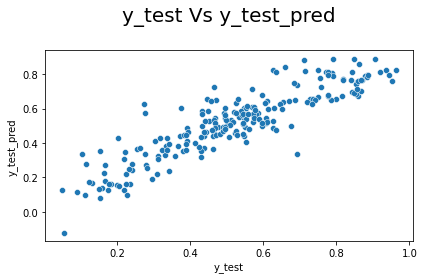

In [148]:
sns.scatterplot(x=y_test,y=y_test_pred)
plt.title('y_test Vs y_test_pred\n', fontsize=20)
plt.xlabel('y_test')
plt.ylabel('y_test_pred')
plt.tight_layout()

__From the above we can infer that the test vs predicted data points are forming a strong linear pattern and are overlapping each other , therefore, the coefficents of our model for each indpendent variable are reliable for determining the effect on target variable and hence , our model is good to go.__

## Step-6: Model Evaluation - Checking Adjusted R-Square 

In [149]:
# Checking statistics on Train Set
train_r_squared = r2_score(y_train,y_train_pred)

# number of rows
N_train = X_train_1.shape[0]

#number of features
P_train = X_train_1.shape[1]


train_adj_r_squared = round(1 - (1-train_r_squared)*(N_train-1)/(N_train-P_train-1),3)

In [150]:
# Checking statistics on test Set
test_r_squared = r2_score(y_test,y_test_pred)

# number of rows
N_test = X_test.shape[0]

#number of features
P_test = X_test.shape[1]


test_adj_r_squared = round(1 - (1-test_r_squared)*(N_test-1)/(N_test-P_test-1),3)


In [151]:
stats_data = [['Train_Data',round(train_r_squared,3),train_adj_r_squared],['Test_Data',round(test_r_squared,3),test_adj_r_squared]]
final_stats = pd.DataFrame(stats_data,columns=['Data Category','R2_Value','Adjusted_R2_Value'])
final_stats

,Data Category,R2_Value,Adjusted_R2_Value
0,Train_Data,0.823,0.819
1,Test_Data,0.796,0.788


## Step-7: Reporting Final Model 

__Below is our final model for the best-fit Multiple Linear Regression__

In [152]:
lr_model7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     257.6
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          1.99e-181
Time:                        12:11:31   Log-Likelihood:                 479.46
No. Observations:                 510   AIC:                            -938.9
Df Residuals:                     500   BIC:                            -896.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0703      0.014      5.164      0.000       0.044       0.097
temp             0.5390      0.022     24.080      0.000       0.495       0.583
season_2         0.0956      0.011      8.336      0.000       0.073       0.118
season_4         0.1462      0.011     13.389      0.000       0.125       0.168
yr_1             0.2313      0.009     27.142      0.000       0.215       0.248
mnth_8           0.0585      0.017      3.399      0.001       0.025       0.092
mnth_9           0.1236      0.017      7.270      0.000       0.090       0.157
holiday_1       -0.1002      0.027     -3.707      0.000      -0.153      -0.047
weathersit_2    -0.0809      0.009     -8.875      0.000      -0.099      -0.063
weathersit_3    -0.2974      0.026    -11.660      0.000      -0.347      -0.247
==============================================================================
Omnibus:                       62.948   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              146.343
Skew:                          -0.658   Prob(JB):                     1.67e-32
Kurtosis:                       5.270   Cond. No.                         9.16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Final equation for best fitted line is:

$ cnt = 0.5390  \times  temp + 0.0956  \times  summer + 0.1462 \times winter + 0.2313 \times yr_1 + 0.0585 \times mnth_8 + 0.1236 \times mnth_9 - 0.1002 \times holiday_1 -0.0809 \times weathersit_2(Mist + Cloudy) -0.2974 \times weathersit_3(Light Rain +Light Snow+ Thunderstorm) $


### Q - Which variables are significant in predicting the demand for shared bikes ?. And How well those variables describe the bike demands?.

#### Answers :

1. The variables __temp, summer, winter, yr1, mnth8(August), mnth9(September), holiday1, weathersit_2(Misty+Cloudy), weathersit_3(Light Rain + Light Snow + Thunderstorm)__ are most significant variables/features that effect the demand for shared bikes.
2. From the above coefficients of variables we could see the ones that are in negative would lead to decrease in demand i.e __holiday_1(if the day is a holiday), and weathersit_2(cloudy weather), weathersit_3(thunderstorm & rain).__
3. The Months __August and September__ have significantly good demand for shared bikes, simlarly the seasons __Summer & Fall__ also have good demand for shared bikes.
4. The most key feature, i.e. __temp(temperature__) plays a very significant role in affecting the demand for shared bikes __approximately 53% of the demand for shared bikes can be explained based on the temperature variable.__

### Recommendations to BoomBikes:

1. The company should try to focus on seasons Summer & Fall where the weather is decent and good for usage of shared bikes where demand is significantly higher compared to other seasons.
2. The company can also aim to increase demand in the months August & September. The temperature here plays a vital role here as it has major impact on the demand of the shared bikes.
3. The year 2019 was better than 2018 in terms of demands for shared bikes, thus company should continue the activities they carried out in year 2019 inorder to increase the demand consistently.
4. We also saw that the days on which there is a holiday, the demand tends to decrease for shared bikes, thus companies can keep special discounts or offers on those days, or the companies can avoid the months in which there are more holidays occurring.